In [77]:
import pandas as pd 
import numpy as np 
from IPython.display import Image

In [78]:
df = pd.read_csv("prof_wb_location.csv")

In [79]:
df

,Unnamed: 0.1,Unnamed: 0,lat,lon,timestamp
0,909677,909677,39.723636,-105.238963,2022-03-09 00:16:38.646000+00:00
1,909678,909678,39.723636,-105.238963,2022-03-09 00:52:39.544000+00:00
2,909679,909679,39.723630,-105.238979,2022-03-09 01:11:38.079000+00:00
3,909680,909680,39.723639,-105.238979,2022-03-09 01:11:56.416000+00:00
4,909681,909681,39.723639,-105.238979,2022-03-09 01:47:57.004000+00:00
...,...,...,...,...,...
1371,911048,911048,46.072694,-118.328500,2022-03-11 23:19:03.306000+00:00
1372,911049,911049,46.072696,-118.328501,2022-03-11 23:27:48.250000+00:00
1373,911050,911050,46.072696,-118.328501,2022-03-11 23:34:09.165000+00:00
1374,911051,911051,46.072695,-118.328503,2022-03-11 23:40:03.242000+00:00


In [80]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

1. Pick a location in Walla Walla -- it can be on the Whitman campus, but it doesn't have to be -- that is NOT  Olin Hall. Find the lat/lon of this location.


I chose the Chase Bank geographical coordinates. 

In [81]:
lon = -118.380674
lat = 46.032639

2. Using the haversine formula, calculate how far Professor Wirfs-Brock was from this location for each data point.

In [82]:
df['distance'] = haversine_np(df['lon'],df['lat'],-118.380674,46.032639) 

In [83]:
df

,Unnamed: 0.1,Unnamed: 0,lat,lon,timestamp,distance
0,909677,909677,39.723636,-105.238963,2022-03-09 00:16:38.646000+00:00,1276.831427
1,909678,909678,39.723636,-105.238963,2022-03-09 00:52:39.544000+00:00,1276.831427
2,909679,909679,39.723630,-105.238979,2022-03-09 01:11:38.079000+00:00,1276.830696
3,909680,909680,39.723639,-105.238979,2022-03-09 01:11:56.416000+00:00,1276.830092
4,909681,909681,39.723639,-105.238979,2022-03-09 01:47:57.004000+00:00,1276.830092
...,...,...,...,...,...,...
1371,911048,911048,46.072694,-118.328500,2022-03-11 23:19:03.306000+00:00,6.000223
1372,911049,911049,46.072696,-118.328501,2022-03-11 23:27:48.250000+00:00,6.000328
1373,911050,911050,46.072696,-118.328501,2022-03-11 23:34:09.165000+00:00,6.000328
1374,911051,911051,46.072695,-118.328503,2022-03-11 23:40:03.242000+00:00,6.000087


4. Answer: What was the furthest Professor Wirfs-Brock was from this location? At what timestamp(s) did this occur? And where was Professor Wirfs-Brock?

In [84]:
max_distance= df["distance"].max()

In [85]:
print ("The greatest distance Prof. Wirfs-Brock was from", max_distance)

The greatest distance Prof. Wirfs-Brock was from 1307.1595712564276


In [86]:
timestamp2 = df[df["distance"] == max_distance]["timestamp"]
timestamp2

116    2022-03-09 12:34:12.029000+00:00
Name: timestamp, dtype: object

In [87]:
print ("The timestamp when Prof. Wirfs-Brock is the furthest away is", timestamp2)

The timestamp when Prof. Wirfs-Brock is the furthest away is 116    2022-03-09 12:34:12.029000+00:00
Name: timestamp, dtype: object


3. Answer: What is the closest Professor Wirfs-Brock came to this location? At what timestamp(s) did this occur?

In [88]:
min_distance=df["distance"].min()

In [89]:
print ("The least distance Prof. Wirfs-Brock was from", min_distance)

The least distance Prof. Wirfs-Brock was from 3.8530656398379874


In [90]:
timestamp1 = df[df["distance"] == min_distance]["timestamp"]

In [91]:
print("The timestamp when that happens is", timestamp1)

The timestamp when that happens is 963    2022-03-10 15:04:17.320000+00:00
Name: timestamp, dtype: object


5. Make a map of Professor Wirfs-Brock's location using Observable. (Tip: Take a look at the activity we did in class.)

In [92]:
image =Image(filename='map.png')

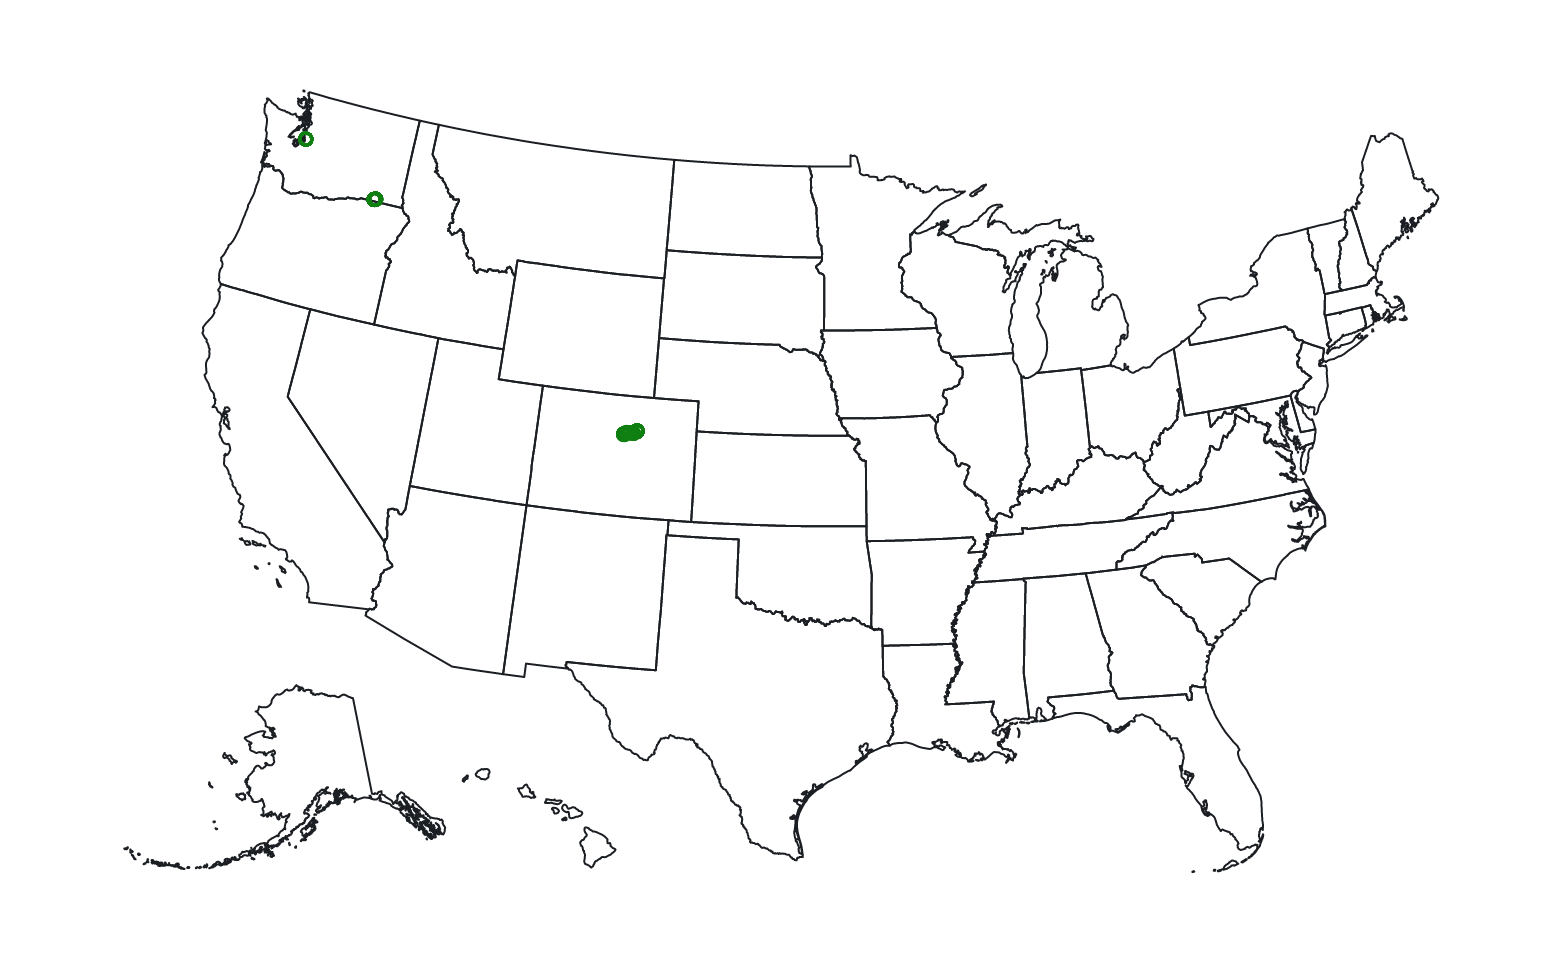

In [93]:
image

In [94]:
Observable_code =Image(filename='code.png')

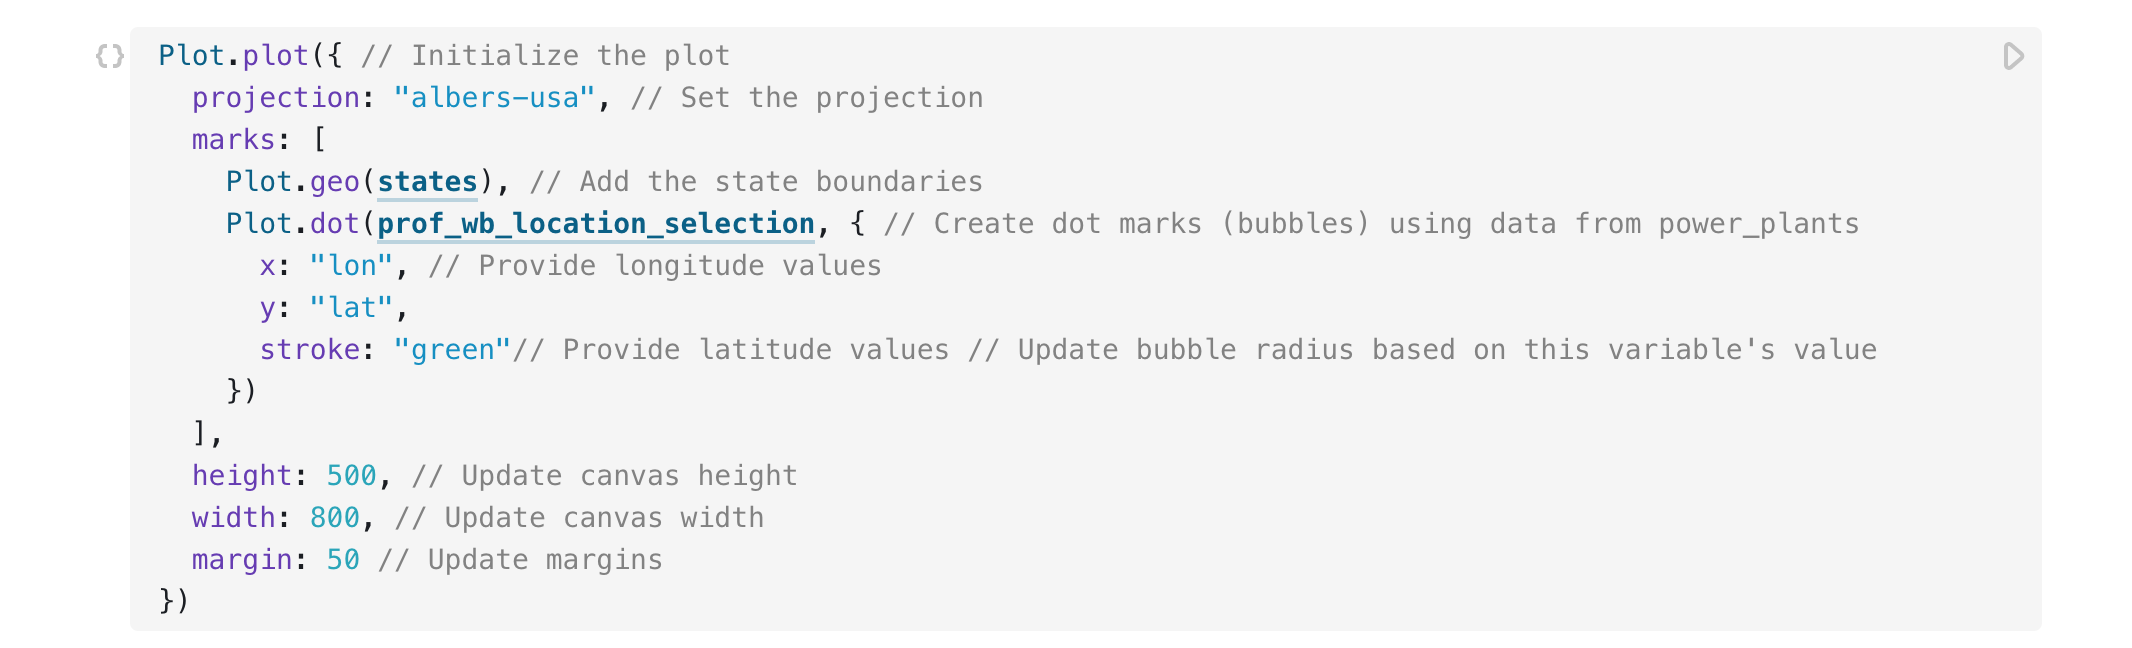

In [95]:
Observable_code

6. Come up with at least one interesting observation/insight about Professor Wirfs-Brock's movements based on this location data.

It seems that Professor Wirfs-Brock visited Colorado, then traveled to two different places in Washington State. Judging by the location of the green dots on the map and the distance between Chase Bank to her location it seems that Professor Wirfs-Brock visited Seattle and Walla Walla in March of 2022. 

# Challenge

Request your own location data from this time period.

I requested my location data from this time period but I was unable to get it as the document I downloaded was an empty file. 

# Part 2: More SQL Baseball Data

1. Start by visiting the Retrosheet site and perusing what is available in "Data Downloads" and elsewhere on this site. Spend some time trying to understand the data and how it is organized.

2. Find and download at least 3 interesting data files that you might download as use as tables to join together in a database. Note: To do this, remember that there needs to be a key/unique identifier that matches between tables! It is your task to figure out how to do this.

The data I have downloaded is Schedules, Game Logs, and Transactions. 